In [366]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("all libraries are imported")

all libraries are imported


In [367]:
#importing the dataset
data=pd.read_csv("googleplaystore.csv")

In [368]:
#reading the dataset
data.shape

(10841, 13)

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [370]:
data.isnull().sum()

#Null values present in Rating,Type,Android Version And Current Version column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [371]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Drop records with nulls in any of the columns.

In [372]:
data=data.dropna()

In [373]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [374]:
data.shape

(9360, 13)

# Size column has sizes in Kb as well as Mb.
To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [375]:
data['Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object>

In [376]:
#Converting from mb to kb

data["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in data["Size"]  ]

In [377]:
data["Size"] = 1000 * data["Size"]

In [382]:
data.head()

#mb has been converted to kb
#19M is now 19000

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)

In [383]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [384]:
# Converting the data type of reviews from object to numeric

data['Reviews']=data['Reviews'].astype('int')

In [385]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Installs field is currently stored as string and has values like 1,000,000+.
Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

In [386]:
data['Installs'].value_counts

<bound method IndexOpsMixin.value_counts of 0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9360, dtype: object>

In [387]:
#Removing the '+' and ',' signs

data['Installs']=data['Installs'].str.replace('+','',regex=True)

In [389]:
data['Installs']=data['Installs'].str.replace(',','',regex=True)

In [390]:
#Converting it into integers

data['Installs']=data['Installs'].astype('int')

# Price field is a string and has dollar symbol.
Remove $ sign, and convert it to numeric.

In [391]:
data['Price']=data['Price'].str.replace('$','',regex=True)

In [392]:
data['Price']=data['Price'].astype('float')

# Sanity checks:
Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [393]:
data.shape

(9360, 13)

In [394]:
#Checking  and dropping Reviews which are not in between 1 and 5

data.drop(data[(data['Rating'] <1) & (data['Rating'] >5 )].index, inplace = True)
data.shape

(9360, 13)

In [395]:
#Checking and dropping records where users who have not installed the app but given reviews

data.drop(data[(data['Reviews']>data['Installs'])].index,inplace=True)
data.shape

(9353, 13)

In [396]:
#Checking and dropping records where Free apps have prices greater tahn 0

data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)
data.shape

(9353, 13)

# Univariate analysis:
Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

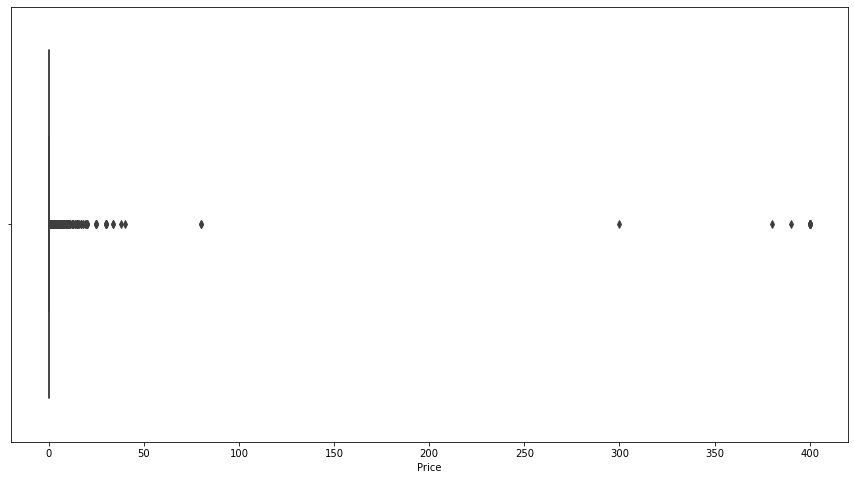

In [397]:
plt.figure(figsize=[15,8])
sns.boxplot(data.Price)
plt.show()
import warnings
warnings.filterwarnings('ignore')

#Outliers are present

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

<function matplotlib.pyplot.show(close=None, block=None)>

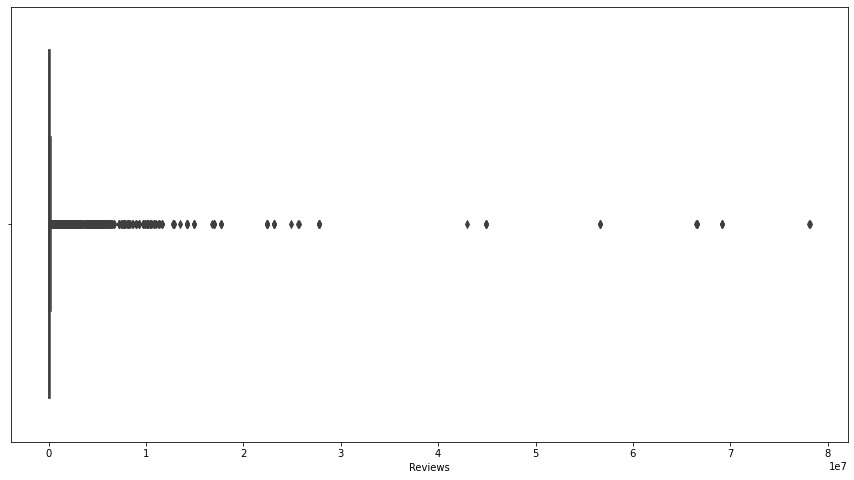

In [398]:
plt.figure(figsize=[15,8])
sns.boxplot(data.Reviews)
plt.show

#There are apps present on high number of reviews

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

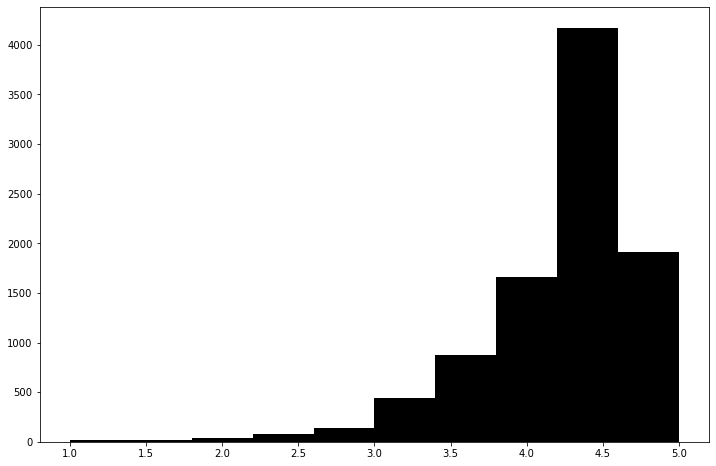

In [399]:
plt.figure(figsize=[12,8])
plt.hist(data.Rating,stacked=True,color='black')

#The ratings are gardually increasing till 4.5
#5 has comparitively less ratings


Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

(array([4779., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

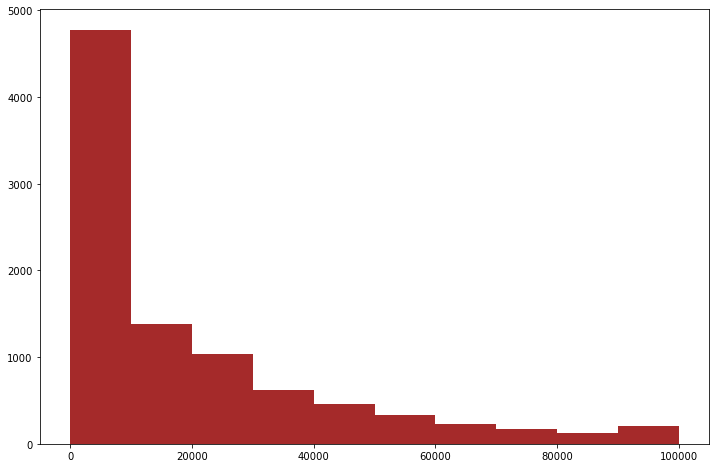

In [400]:
plt.figure(figsize=[12,8])
plt.hist(data.Size,stacked=True,color='brown')


to determine any outliers better we can do the boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

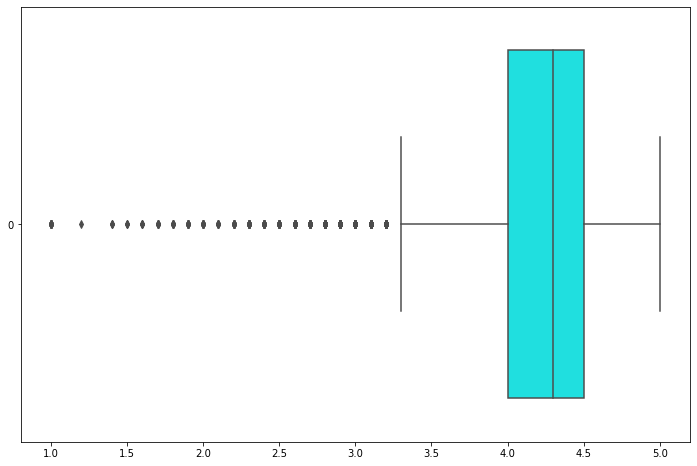

In [401]:
#Boxplot for Rating
plt.figure(figsize=[12,8])
sns.boxplot(data=data.Rating,orient='h',color='cyan')
plt.show

#Outliers present on the lower ratings

<function matplotlib.pyplot.show(close=None, block=None)>

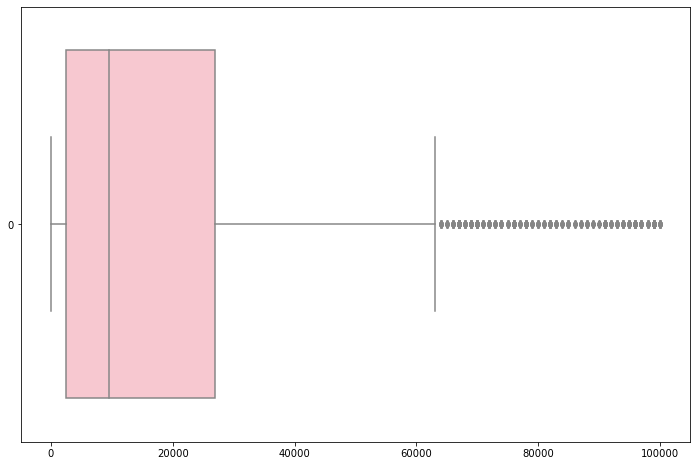

In [402]:
#boxplot for size
plt.figure(figsize=[12,8])
sns.boxplot(data=data.Size,orient='h',color='pink')
plt.show

#Outliers present on the higher end of the size

# Outlier treatment:

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious! Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

In [403]:
#Checking records

high_price = data.apply(lambda x : True
            if x['Price'] > 200 else False, axis = 1)

In [404]:
high_price_count = len(high_price[high_price == True].index) 

In [405]:
high_price_count

15

In [406]:
# dropping the high values

data.drop(data[(data['Price']>200)].index,inplace=True)

In [407]:
data.shape

(9338, 13)

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [408]:
data.drop(data[data['Reviews']>2000000].index,inplace=True)

In [409]:
data.shape

(8885, 13)

Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [410]:
data.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])


,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,0.0,1000.0,0.00
0.25,4.0,159.00,2600.0,10000.0,0.00
0.50,4.3,4290.00,9500.0,500000.0,0.00
0.70,4.5,35930.40,23000.0,1000000.0,0.00
0.90,4.7,296771.00,50000.0,10000000.0,0.00
0.95,4.8,637298.00,68000.0,10000000.0,1.99
0.99,5.0,1462800.88,95000.0,100000000.0,7.49


In [411]:
# If we decide the cutoff to be 95% then we should drop the data from the installs column which are more than 95%

data.drop(data[(data['Installs']>10000000)].index,inplace=True)

In [412]:
data.shape

(8496, 13)

# Bivariate analysis:
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

<AxesSubplot:xlabel='Rating', ylabel='Price'>

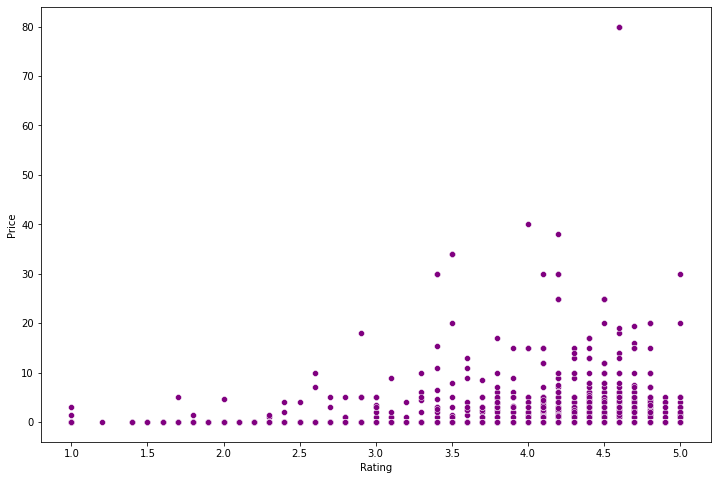

In [413]:
#Scatter Plot for rating verses price

plt.figure(figsize=[12,8])
sns.scatterplot(x='Rating',y='Price',data=data,color='purple')

#We observe rating increases with Price

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

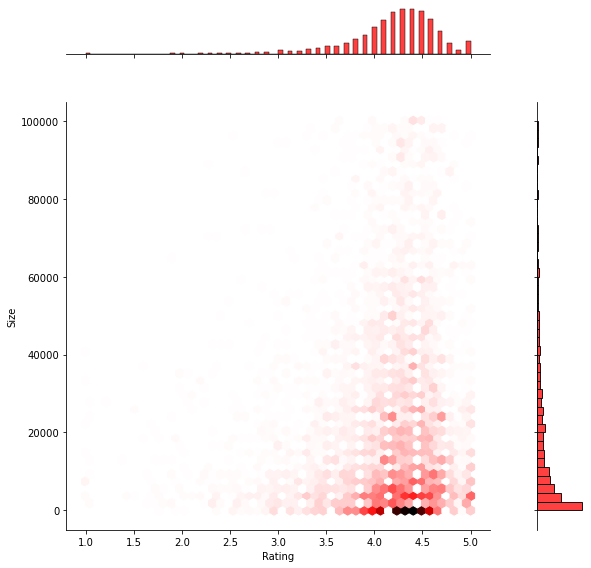

In [414]:
sns.jointplot(x='Rating',y='Size',data=data,kind="hex",height=8,space=1,color='Red')

#We observe rating is not dependent on size infact rating is much more concentrated towards the smaller sized apps

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

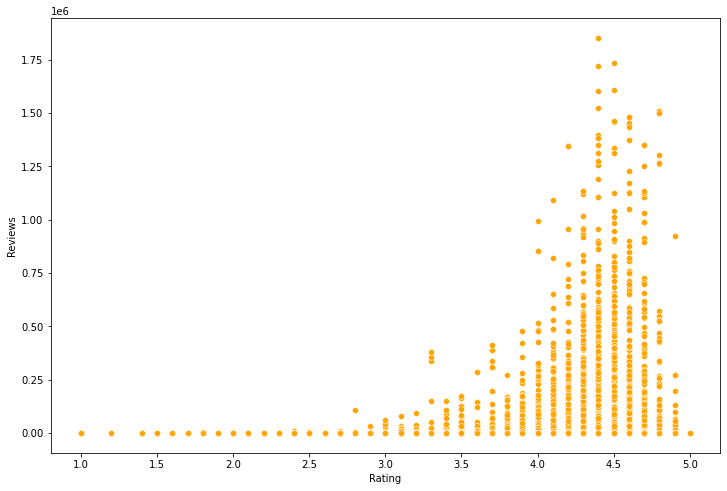

In [415]:
plt.figure(figsize=[12,8])
sns.scatterplot(x='Rating',y='Reviews',data=data,color='orange')

#Yes,Ratings is dependent on Review. More the Reviews better the ratings

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

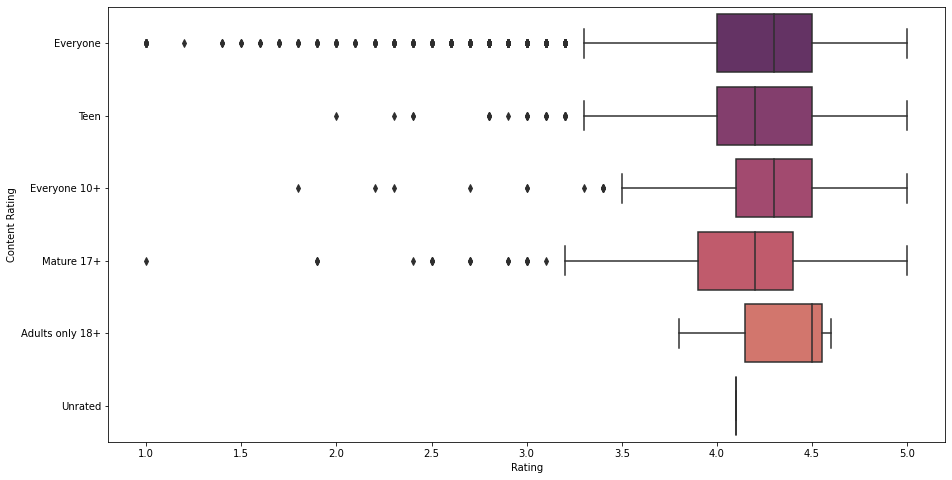

In [416]:
plt.figure(figsize=[15,8])
sns.boxplot('Rating','Content Rating',data=data,orient='h',palette='flare_r')

#There are diffrence in rating
#Apps for adults only has ratings around 4.5 which is good
#Apps for everyone has the maxixmum outliers

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

<AxesSubplot:xlabel='Rating', ylabel='Category'>

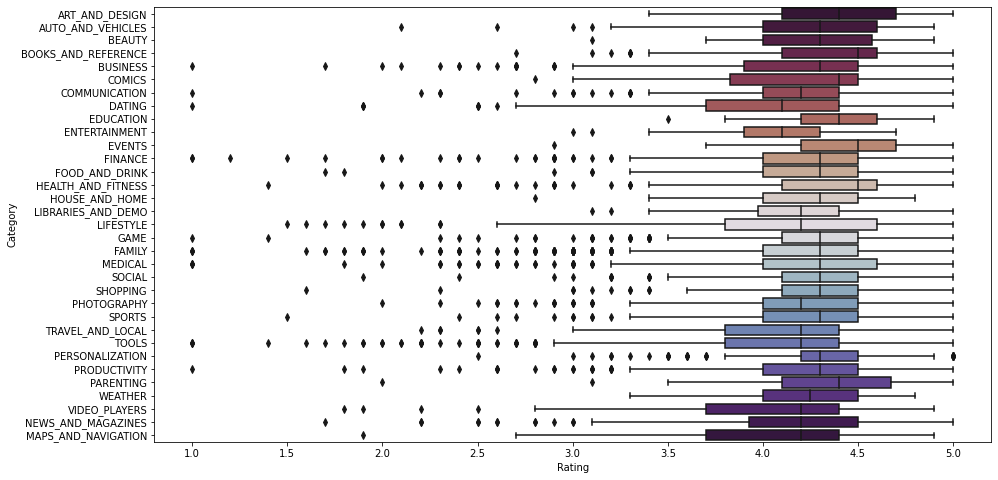

In [418]:
plt.figure(figsize=[15,8])
sns.boxplot('Rating','Category',data=data,palette='twilight_shifted_r')

#Events genre has the best rating and the minimum outlier
#Median value is at 4.5

# Data preprocessing
Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [419]:
inp1=data

In [420]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [421]:
inp1.skew()

Rating      -1.749753
Reviews      4.576494
Size         1.655917
Installs     1.543697
Price       16.264811
dtype: float64

In [422]:
#Skewing Review data

reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [424]:
reviewskew.skew()

-0.20039949659264134

In [425]:
#Skewing Installs data

installsskew=np.log1p(inp1['Installs'])
inp1['Installs']=installsskew

In [426]:
installsskew.skew()

-0.5097286542754812

In [427]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [428]:
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [429]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


# Get dummy columns for Category, Genres, and Content Rating.
This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [430]:
inp2=inp1

In [431]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


Applying dummy encoding on Category column


In [432]:
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [433]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [434]:
inp2.shape

(8496, 40)

Creating dummy variable for genre column


In [436]:
inp2.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [437]:
# since there are too many categories
#We will group few categories under others
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [438]:
inp2.Genres.unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [439]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [440]:
inp2.shape

(8496, 91)

In [442]:
inp2.head()


,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Creating dummy variable for Content Rating

In [443]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [444]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [445]:
inp2.shape

(8496, 96)

# Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [464]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(inp2,test_size=0.3,random_state=150)


In [465]:
df_train.shape

(5947, 96)

In [466]:
df_test.shape

(2549, 96)

In [467]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=150)

# Model building

Use linear regression as the technique

Report the R2 on the train set

In [472]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [473]:
#Building the model

linear_reg.fit(X_train,y_train)

LinearRegression()

In [485]:
#R@ on train set

from sklearn.metrics import r2_score
r2_train =linear_reg.score(X_train,y_train)
r2_train

0.1577607839358478

 Make predictions on test set and report R2.
 

In [487]:
from sklearn.metrics import r2_score
r2_test =linear_reg.score(X_test,y_test)
r2_test

0.13899352439313784